Harsha B11            5801
Eswar B11             5290
RISHIK B31            3452
Harish Bokka          2963
Ganesh Raju B19       2084
Vivek B12             1823
Shiva B18             1225
Rohit B11             1196
Vishal B11            1104
Prudhvi B11            883
Gowtham B19            798
Devesh B19             701
Adharsh B11            692
Radhakrishna B31       665
Purna Chandra          665
Subash                 657
Hemanth Thumati        255
Karthik B19            248
Aditya B19             243
Srikanth B11           226
Tarun B11              206
Sai Chand B31          194
Avinash B11            132
Tejus Varma B11         99
Abhiram Gorela B11      83
Sahasra B31             73
Teja Chowdary B18       61
Ankit Cr                56
Leela Sai Gitam         44
Nazeer Syed B12         39
Vivek B11               37
Gopichand B33           28
Sai Prasana             21
Chandu Narapinni        20
Pranav Sharma B12       17
Praneeth B12            15
Pavan B12               13
S

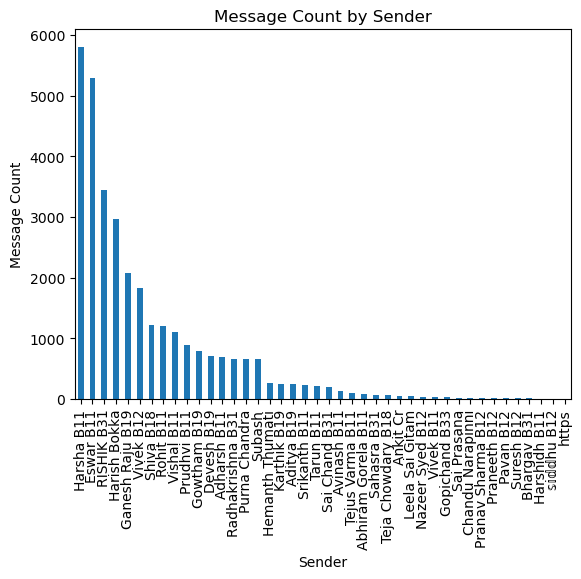

sender
Abhiram Gorela B11    31.168675
Adharsh B11           14.952312
Aditya B19            13.374486
Ankit Cr              20.892857
Avinash B11           28.492424
Bhargav B31            8.833333
Chandu Narapinni       9.450000
Devesh B19            20.449358
Eswar B11             18.246314
Ganesh Raju B19       24.548944
Gopichand B33         20.857143
Gowtham B19           16.617794
Harish Bokka          14.059062
Harsha B11            22.044647
Harshidh B11          12.714286
Hemanth Thumati       21.490196
Karthik B19           24.766129
Leela Sai Gitam       21.681818
Nazeer Syed B12       23.846154
Pavan B12             19.230769
Pranav Sharma B12     18.000000
Praneeth B12          19.533333
Prudhvi B11           20.431484
Purna Chandra         18.872180
RISHIK B31            15.137891
Radhakrishna B31      18.860150
Rohit B11             29.102007
Sahasra B31           22.287671
Sai Chand B31         18.484536
Sai Prasana           19.857143
Shiva B18             21.445714
S

C:\Users\DELL\AppData\Local\Temp\ipykernel_12916\2240945004.py:51: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


Most used emoji by Abhiram Gorela B11: ☝️ (Count: 1)
Most used emoji by Adharsh B11: 😂 (Count: 59)
Most used emoji by Aditya B19: 😂 (Count: 12)
Most used emoji by Ankit Cr: 😂 (Count: 5)
Most used emoji by Avinash B11: 😂 (Count: 6)
Most used emoji by Bhargav B31: 😂 (Count: 2)
Most used emoji by Chandu Narapinni: 🍻 (Count: 1)
Most used emoji by Devesh B19: 😂 (Count: 36)
Most used emoji by Eswar B11: 😂 (Count: 226)
Most used emoji by Ganesh Raju B19: 😂 (Count: 252)
Most used emoji by Gopichand B33: 🎂 (Count: 1)
Most used emoji by Gowtham B19: 😂 (Count: 43)
Most used emoji by Harish Bokka: 🤣 (Count: 292)
Most used emoji by Harsha B11: 😂 (Count: 34)
Most used emoji by Hemanth Thumati: 🙄 (Count: 4)
Most used emoji by Karthik B19: 😄 (Count: 14)
Most used emoji by Leela Sai Gitam: 😂 (Count: 2)
Most used emoji by Nazeer Syed B12: 😂 (Count: 1)
Most used emoji by Pavan B12: 🎂 (Count: 1)
Most used emoji by Pranav Sharma B12: 😂 (Count: 3)
Most used emoji by Praneeth B12: ✋ (Count: 1)
Most used emoj

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import emoji
import demoji

# Path to the exported chat file
chat_file = 'b11.txt'

# Define the multi-character delimiter
delimiter = ' - '

# Read the chat file into a DataFrame
chat_data = []
with open(chat_file, 'r', encoding='utf-8') as file:
    for line in file:
        parts = re.split(delimiter, line.strip(), maxsplit=1)
        if len(parts) == 2:
            chat_data.append(parts)

# Create a DataFrame from the chat data
df = pd.DataFrame(chat_data, columns=['timestamp', 'message'])

# Extract sender information from messages
df['sender'] = df['message'].str.extract(r'^([\w\s]+):')

# Drop rows without sender information (media files, etc.)
df = df.dropna(subset=['sender'])

# Extract message content and handle media files
df['message'] = df['message'].str.replace(r'^([\w\s]+):', '', regex=True).str.strip()
df.loc[df['message'] == '<Media omitted>', 'message'] = '[Media File]'

# Count the number of messages sent by each participant
message_counts = df['sender'].value_counts()
print(message_counts)

# Plot a bar chart of the message counts
message_counts.plot(kind='bar')
plt.xlabel('Sender')
plt.ylabel('Message Count')
plt.title('Message Count by Sender')
plt.show()

# Calculate the average message length for each participant
df['message_length'] = df['message'].str.len()
avg_message_length = df.groupby('sender')['message_length'].mean()
print(avg_message_length)

# Download and update demoji library's emoji database
demoji.download_codes()

# Function to extract emojis from a text
def extract_emojis(text):
    emojis = demoji.findall(text)
    return list(emojis.keys())

# Extract emojis from messages
df['emojis'] = df['message'].apply(extract_emojis)

# Count the number of emojis used by each participant
emoji_counts = df.explode('emojis').groupby('sender')['emojis'].value_counts()

# Print the most used emojis by each participant
for sender, emojis in emoji_counts.groupby(level=0):
    most_used_emoji = emojis.index[0][1]
    count = emojis[0]
    print(f"Most used emoji by {sender}: {most_used_emoji} (Count: {count})")


In [15]:
df

,timestamp,message,sender,message_length,emojis
1,"1/8/21, 10:02 AM",Happy Pongal ki matram perfect ga reply estharu,Radhakrishna B31,47,[]
4,"1/8/21, 10:03 AM",Sir ki ra,Radhakrishna B31,9,[]
6,"1/8/21, 10:03 AM",[Media File],Radhakrishna B31,12,[]
10,"1/8/21, 10:04 AM",Byee ra,Radhakrishna B31,7,[]
14,"1/8/21, 10:06 AM",[Media File],Radhakrishna B31,12,[]
...,...,...,...,...,...
39929,"6/13/22, 6:27 PM",Istharu le,Vivek B12,10,[]
39933,"6/13/22, 6:52 PM",S,Vivek B12,1,[]
39938,"6/25/22, 11:29 AM",[Media File],Vivek B12,12,[]
39947,"7/9/22, 10:37 AM",[Media File],Shiva B18,12,[]


In [2]:
unique_senders = df['sender'].unique()
print(unique_senders)

['Radhakrishna B31' 'Gowtham B19' 'Vivek B12' 'Ganesh Raju B19'
 'Devesh B19' 'Vishal B11' 'Pavan B12' 'RISHIK B31' 'Harish Bokka'
 'Eswar B11' '𝕤𝕚𝕕𝕕hu B12' 'Rohit B11' 'Nazeer Syed B12' 'Purna Chandra'
 'Harsha B11' 'Gopichand B33' 'Karthik B19' 'Vivek B11' 'Tarun B11'
 'Leela Sai Gitam' 'Sahasra B31' 'Prudhvi B11' 'Avinash B11'
 'Sai Chand B31' 'Teja Chowdary B18' 'Chandu Narapinni' 'Hemanth Thumati'
 'Subash' 'Adharsh B11' 'Shiva B18' 'Abhiram Gorela B11' 'Praneeth B12'
 'https' 'Aditya B19' 'Bhargav B31' 'Tejus Varma B11' 'Srikanth B11'
 'Ankit Cr' 'Sai Prasana' 'Pranav Sharma B12' 'Suresh B12' 'Harshidh B11']


In [3]:
# Specify the name of the person you want to filter by
target_person = input()

# Filter the DataFrame to get chats sent by the target person
target_chats = df[df['sender'] == target_person]

# Print the chats sent by the target person
for message in target_chats['message']:
    print(message)


https
//milaap.org/fundraisers/RAHUL0508?utm_source=whatsapp&utm_medium=campaign_created
//milaap.org/fundraisers/rahul0508/deeplink?deeplink_type=paytm


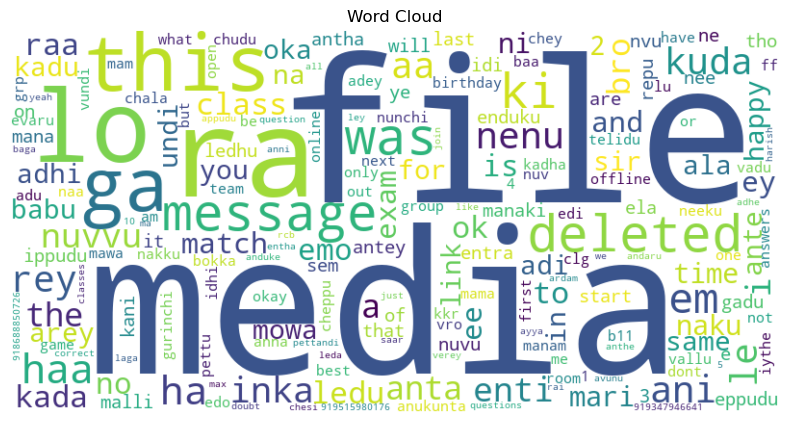

In [4]:
from wordcloud import WordCloud
from collections import Counter

# Combine all the messages into a single string
all_messages = ' '.join(df['message'])

# Remove punctuation and convert to lowercase
all_messages = re.sub(r'[^\w\s]', '', all_messages).lower()

# Split the string into individual words
words = all_messages.split()

# Count the frequency of each word
word_counts = Counter(words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


In [5]:
 # Count the number of messages sent by each participant
message_counts = df['sender'].value_counts()

# Find the most active participant
most_active_sender = message_counts.idxmax()
most_active_count = message_counts.max()

print(f"The most active sender is {most_active_sender} with {most_active_count} messages.")


The most active sender is Harsha B11 with 5801 messages.


In [6]:
# Group the DataFrame by sender and calculate the total message count and earliest and latest timestamps
sender_stats = df.groupby('sender').agg({'message': 'count', 'timestamp': ['min', 'max']})

# Find the most active sender
most_active_sender = sender_stats['message'].idxmax()

# Get the earliest and latest timestamps of the most active sender
earliest_timestamp = sender_stats.loc[most_active_sender, ('timestamp', 'min')]
latest_timestamp = sender_stats.loc[most_active_sender, ('timestamp', 'max')]

print(f"The most active sender is {most_active_sender}.")
print(f"Earliest message timestamp: {earliest_timestamp}")
print(f"Latest message timestamp: {latest_timestamp}")


The most active sender is count    Harsha B11
dtype: object.
Earliest message timestamp: sender
Harsha B11    1/23/21, 4:18 PM
Name: (timestamp, min), dtype: object
Latest message timestamp: sender
Harsha B11    9/9/21, 8:15 AM
Name: (timestamp, max), dtype: object


In [7]:
import pandas as pd

# Count the number of messages sent by each participant
message_counts = df['sender'].value_counts()

# Find the least active participant
least_active_participant = message_counts.idxmin()
least_active_message_count = message_counts.min()

print(f"Least active participant: {least_active_participant}")
print(f"Message count: {least_active_message_count}")


Least active participant: https
Message count: 2


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


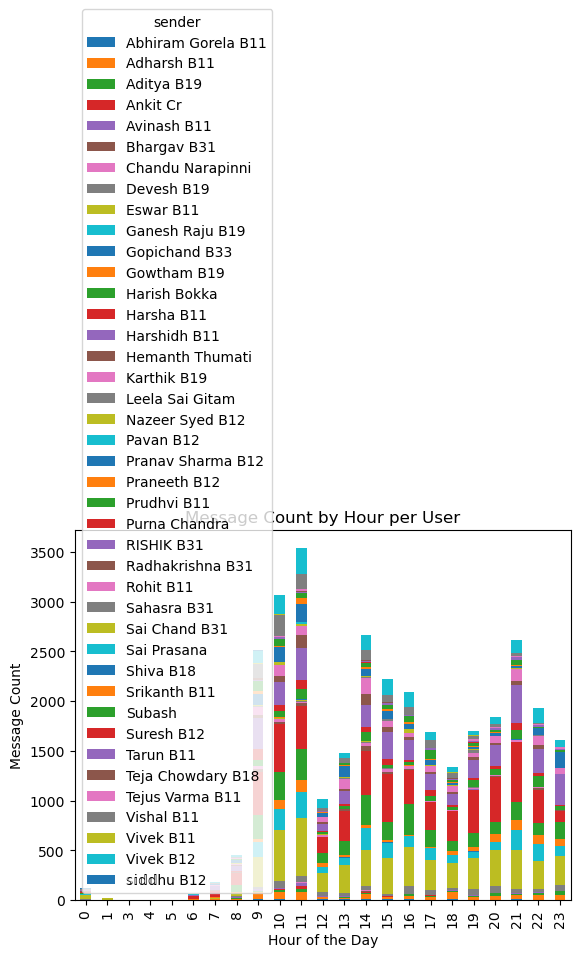

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamp column to datetime format, handle errors
try:
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%y, %I:%M %p', errors='coerce')
except ValueError:
    print("Error: Invalid timestamp format in the 'timestamp' column.")

# Drop rows with invalid timestamps
df = df.dropna(subset=['timestamp'])

# Extract the hour from the timestamps
df['hour'] = df['timestamp'].dt.hour

# Group the data by hour and sender, and count the number of messages
message_count_by_hour = df.groupby(['hour', 'sender']).size().reset_index(name='message_count')

# Pivot the data to have the users as columns and hours as index
pivot_table = message_count_by_hour.pivot(index='hour', columns='sender', values='message_count')

# Plot the message count by hour for each user
pivot_table.plot(kind='bar', stacked=True)

# Set plot labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Message Count")
plt.title("Message Count by Hour per User")

# Display the plot
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


Radhakrishna B31


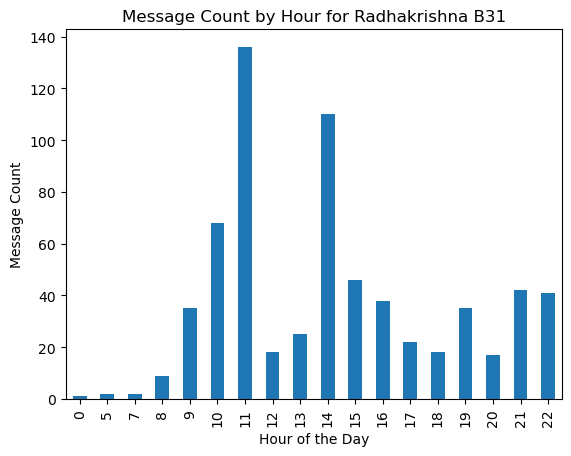

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamp column to datetime format, handle errors
try:
    df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%y, %I:%M %p', errors='coerce')
except ValueError:
    print("Error: Invalid timestamp format in the 'timestamp' column.")

# Drop rows with invalid timestamps
df = df.dropna(subset=['timestamp'])

# Specify the name of the target person
target_person = input()

# Filter the data for the target person
target_df = df[df['sender'] == target_person]

# Extract the hour from the timestamps
target_df['hour'] = target_df['timestamp'].dt.hour

# Group the data by hour and count the number of messages
message_count_by_hour = target_df.groupby('hour').size()

# Plot the message count by hour for the target person
message_count_by_hour.plot(kind='bar')

# Set plot labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Message Count")
plt.title("Message Count by Hour for " + target_person)

# Display the plot
plt.show()


Gowtham B19


C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


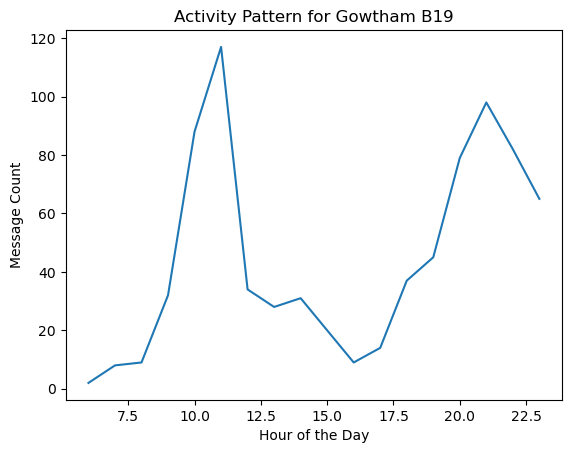

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame for a specific person
person = input() # Specify the name of the person
person_df = df[df['sender'] == person]

# Convert timestamp column to datetime format
person_df['timestamp'] = pd.to_datetime(person_df['timestamp'], format='%m/%d/%y, %I:%M %p')

# Extract the hour from the timestamps
person_df['hour'] = person_df['timestamp'].dt.hour

# Count the number of messages for each hour
hourly_activity = person_df['hour'].value_counts().sort_index()

# Plot the activity pattern
plt.plot(hourly_activity.index, hourly_activity.values)

# Set plot labels and title
plt.xlabel("Hour of the Day")
plt.ylabel("Message Count")
plt.title("Activity Pattern for " + person)

# Display the plot
plt.show()


In [24]:
import pandas as pd

# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%y, %I:%M %p')

# Extract the day of the week from the timestamps
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Filter the data for weekends (day_of_week = 5 for Saturday, day_of_week = 6 for Sunday)
weekend_data = df[df['day_of_week'].isin([5, 6])]

# Calculate the message count for each sender during weekends
message_counts = weekend_data['sender'].value_counts()

# Find the sender with the maximum message count
most_active_sender = message_counts.idxmax()

print("Person most active during weekends:", most_active_sender)

# Find the sender with the minimum message count
least_active_sender = message_counts.idxmin()

print("Person least active during weekends:", least_active_sender)


Person most active during weekends: Harsha B11
Person least active during weekends: Pranav Sharma B12


In [23]:
import pandas as pd

# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%y, %I:%M %p')

# Extract the day of the week from the timestamps
df['day_of_week'] = df['timestamp'].dt.dayofweek

# Filter the data for weekdays (day_of_week = 0 to 4 for Monday to Friday)
weekday_data = df[df['day_of_week'].isin([0, 1, 2, 3, 4])]

# Calculate the message count for each sender during weekdays
message_counts = weekday_data['sender'].value_counts()

# Find the most active sender during weekdays
most_active_sender = message_counts.idxmax()

# Find the least active sender during weekdays
least_active_sender = message_counts.idxmin()

print("Most active person during weekdays:", most_active_sender)
print("Least active person during weekdays:", least_active_sender)


Most active person during weekdays: Harsha B11
Least active person during weekdays: 𝕤𝕚𝕕𝕕hu B12
